# Other procedures to generate XZ masks

In [1]:
from diffractio import plt, np, mm, degrees, um
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Adding masks

In this case, there is not a function, just use several masks in the same instance.

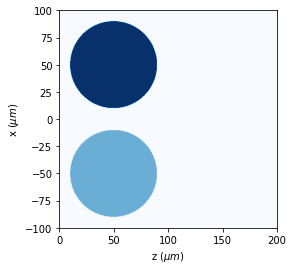

In [9]:
x = np.linspace(-100*um, 100*um, 512)
z = np.linspace(0*um, 200*um, 512)
wavelength = 0.6328 * um

t1 = Scalar_mask_XZ(x, z, wavelength)
t1.cylinder(r0=(-50 * um, 50 * um), radius=(40 * um, 40 * um), refractive_index = 1.5, angle=0 * degrees)
t1.cylinder(r0=(+50 * um, 50 * um), radius=(40 * um, 40 * um), refractive_index = 2, angle=0 * degrees)


t1.draw_refractive_index(scale='scaled')

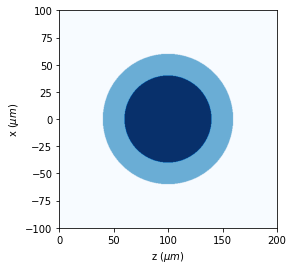

In [12]:
x = np.linspace(-100*um, 100*um, 512)
z = np.linspace(0*um, 200*um, 512)
wavelength = 0.6328 * um

t1 = Scalar_mask_XZ(x, z, wavelength)
t1.cylinder(r0=(0 * um, 100 * um), radius=60*um, refractive_index = 1.5, angle=0 * degrees)
t1.cylinder(r0=(0 * um, 100 * um), radius=40*um, refractive_index = 2, angle=0 * degrees)


t1.draw_refractive_index(scale='scaled')

## Substracting masks

In the same way, substracting mask is simple, just place a mask with the hole whose refractive index is the same than the background

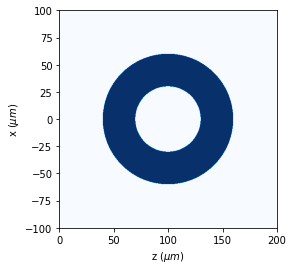

In [14]:
x = np.linspace(-100*um, 100*um, 512)
z = np.linspace(0*um, 200*um, 512)
wavelength = 0.6328 * um
n_background=1

t1 = Scalar_mask_XZ(x, z, wavelength, n_background=n_background)
t1.cylinder(r0=(0 * um, 100 * um), radius=60*um, refractive_index = 1.5, angle=0 * degrees)
t1.cylinder(r0=(0 * um, 100 * um), radius=30*um, refractive_index = n_background, angle=0 * degrees)


t1.draw_refractive_index(scale='scaled')

## Mask from surface functions

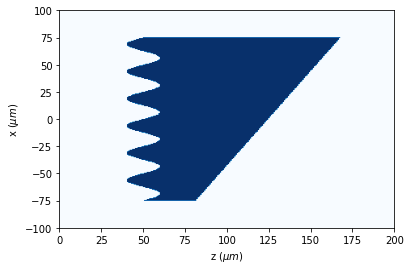

In [26]:
x0 = np.linspace(-100*um, 100*um, 256)
z0 = np.linspace(0*um, 200*um, 256)
wavelength = 0.6238*um

f1 = '50*um+10*np.sin(2*np.pi*self.X/25)'
f2 = "125*um+np.tan(30*degrees)*(self.X-0*um)"
z_sides = (-75*um, 75*um)
v_globals = {'um': 1, 'np': np}

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.mask_from_function(r0=(0*um, 0*um),
                        refractive_index=1.5,
                        f1=f1,
                        f2=f2,
                        z_sides=z_sides,
                        angle=0*degrees,
                        v_globals=v_globals)

t1.draw_refractive_index()


## Insert_array_masks #TODO
The mask is repited in x-y axis separated a certain distance

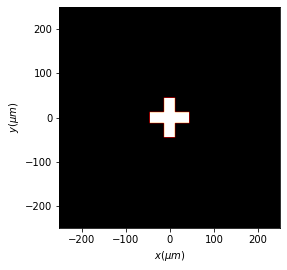

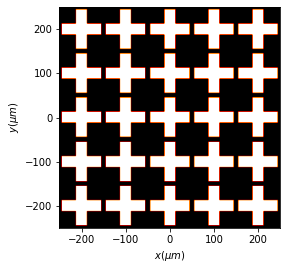

In [10]:
x = np.linspace(-250 * um, 250 * um, 512)
z = np.linspace(-250 * um, 250 * um, 512)
wavelength = 1 * um

s = Scalar_mask_XZ(x, z, wavelength)
s.cross(r0=(0 * um, 0 * um), size=(90 * um, 25 * um), angle=0 * degrees)
s.draw()

t1 = Scalar_mask_XZ(x, y, wavelength)
num_points = t1.insert_array_masks(
    t1=s, space=[100 * um, 100 * um], margin=50 * um, angle=90 * degrees
)
t1.draw(kind="intensity")

In [11]:
print(s)

Scalar_mask_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -250.00 um,  xmax:      250.00 um,  Dx:   0.98 um
 - ymin:       -250.00 um,  ymax:      250.00 um,  Dy:   0.98 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 0.00 deg
 - wavelength: 1.00 um
 - date:       2024-10-21_19_25_05



In [12]:
print(t1)

Scalar_mask_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -250.00 um,  xmax:      250.00 um,  Dx:   0.98 um
 - ymin:       -250.00 um,  ymax:      250.00 um,  Dy:   0.98 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 180.00 deg
 - wavelength: 1.00 um
 - date:       2024-10-21_19_25_05



## repeat_structure #TODO

The mask si repeated (n,m) times. The size of the new mask is (n,m) times greater.

AttributeError: 'Scalar_mask_XZ' object has no attribute 'repeat_structure'

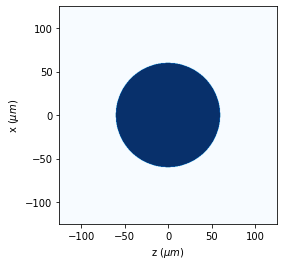

In [29]:
size = 250 * um
x0 = np.linspace(-size / 2, size / 2, 512)
z0 = np.linspace(-size / 2, size / 2, 512)
wavelength = 0.6328 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.cylinder(r0=(0 * um, 0 * um), radius=60*um, refractive_index = 1.5, angle=0 * degrees)
t1.draw_refractive_index(scale='scaled')

cylinders = t1.repeat_structure(
    num_repetitions=(4, 4), position="center", new_field=True
)
cylinders.draw_refractive_index(scale='scaled')

In [14]:
print(cylinder)

Scalar_mask_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -125.00 um,  xmax:      125.00 um,  Dx:   0.49 um
 - ymin:       -125.00 um,  ymax:      125.00 um,  Dy:   0.49 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  -179.93 deg, phase_max: 180.00 deg
 - wavelength: 0.63 um
 - date:       2024-10-21_19_25_06



In [15]:
print(cylinders)

Scalar_mask_XY
 - x:  (2048,),   y:  (2048,),   u:  (2048, 2048)
 - xmin:       -500.00 um,  xmax:      500.00 um,  Dx:   0.49 um
 - ymin:       -500.00 um,  ymax:      500.00 um,  Dy:   0.49 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  -179.93 deg, phase_max: 180.00 deg
 - wavelength: 0.63 um
 - date:       2024-10-21_19_25_06

